In [45]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn import tree

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings('ignore')

df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [46]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [47]:
df.shape

(253680, 22)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [49]:
def change_col_data_types(df, col_lst, data_type):
    for col in col_lst:
        df[col] = df[col].astype(data_type)

change_col_data_types(df, df.columns, int)
print(df.dtypes)

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


Text(0.5, 1.0, 'Correlation Heatmap')

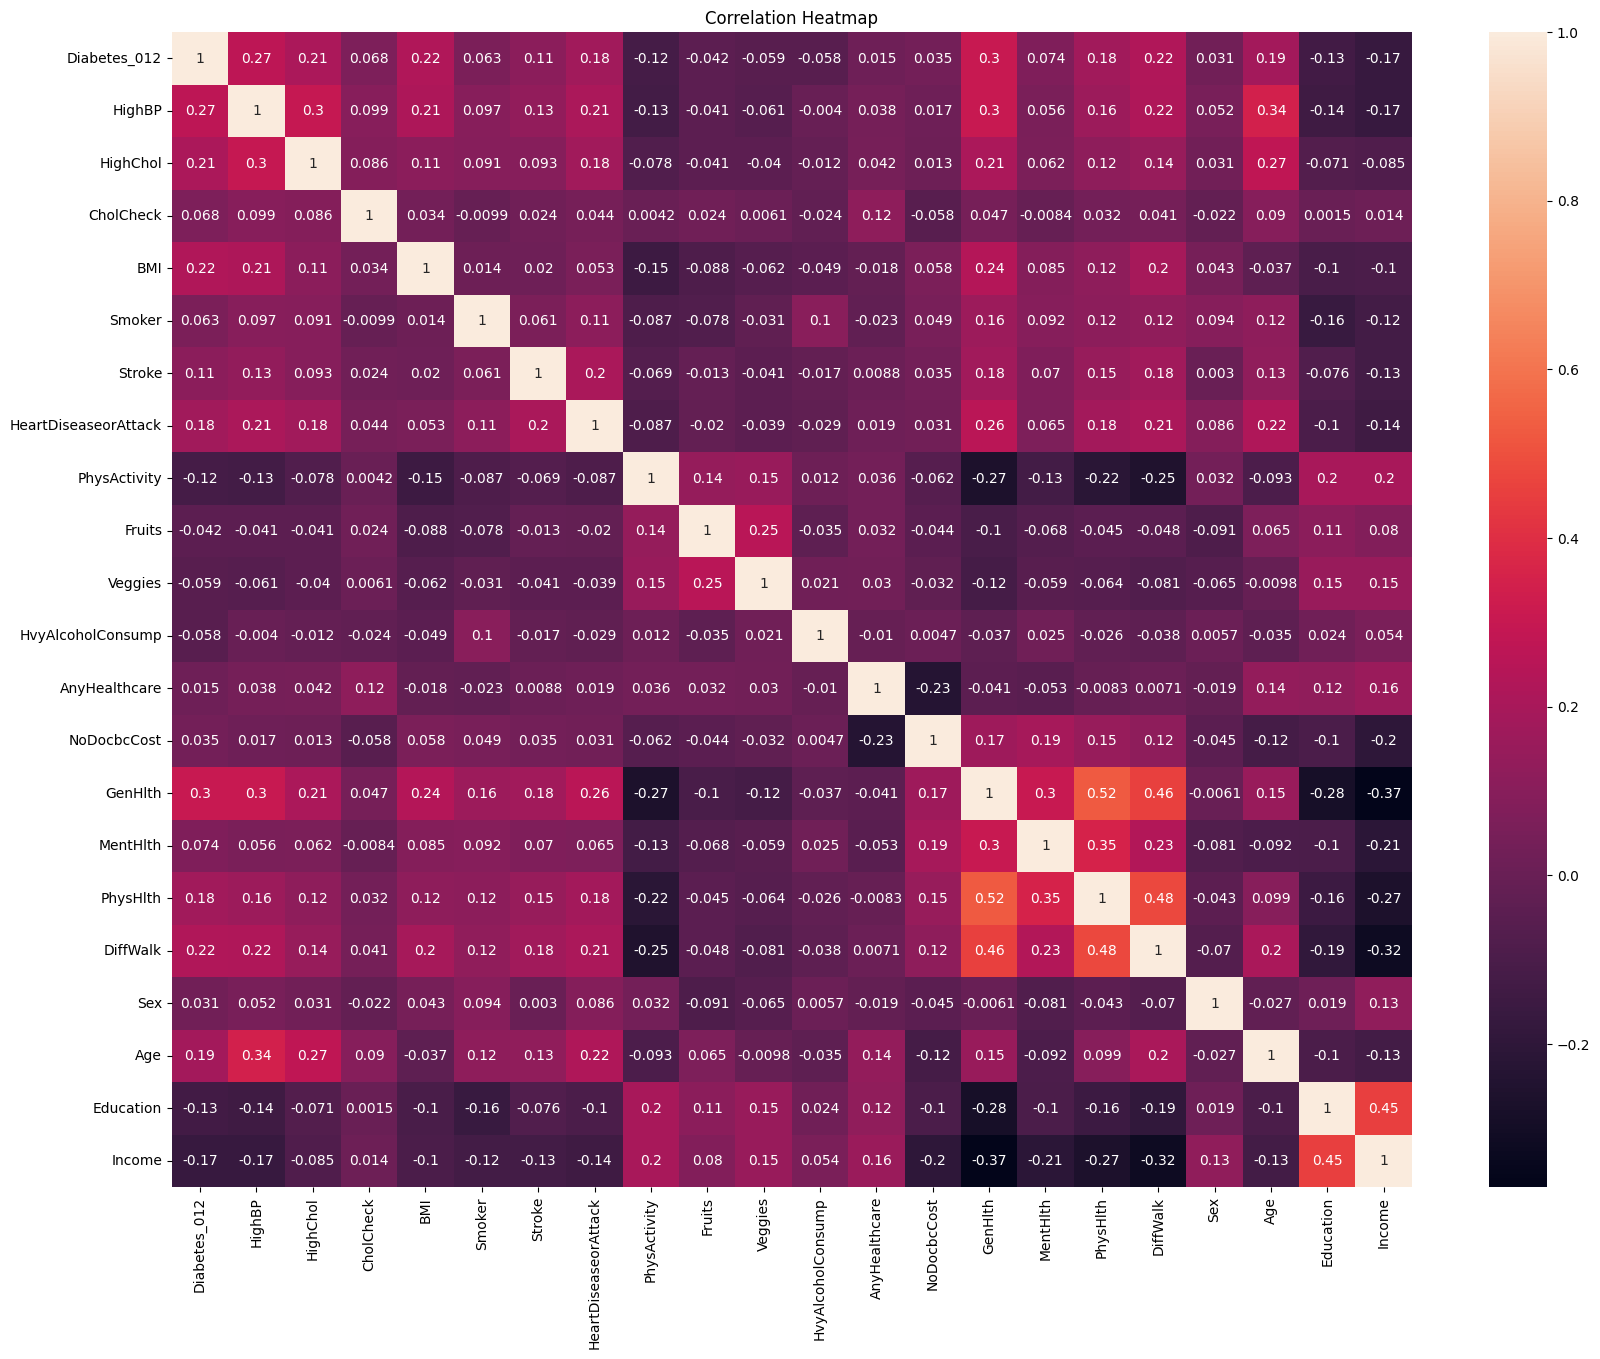

In [50]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True).set_title('Correlation Heatmap')

**Major Variables which causes Diabetes:**
GenHlth, HighBP, Diffwalk, BMI, HighChol, Age, HeartDiseaseAttack, PhysHlth, stroke, CholCheck, Income, Education, PhysActivity, HvyAlcoholConsump

 **Variables with low correlation with diabetes:Variables with low correlation with diabetes:**

Sex, AnyHealthcare, NodocbcCost, Fruits

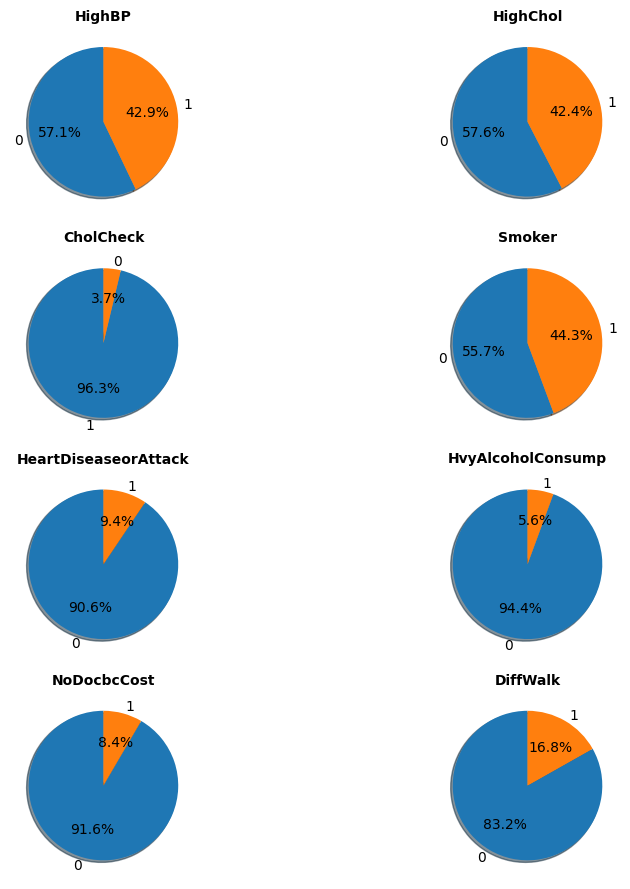

In [51]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 2, figsize=(11, 9))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Pie chart for 'HighBP'
highbp_counts = df['HighBP'].value_counts()
axs[0, 0].pie(highbp_counts,
              labels=highbp_counts.index,
              autopct='%1.1f%%',
              startangle=90,
              colors=colors[:len(highbp_counts)],
              shadow=True)
axs[0, 0].set_title('HighBP', fontsize=10, weight='bold')

# Pie chart for 'HighChol'
highchol_counts = df['HighChol'].value_counts()
axs[0, 1].pie(highchol_counts,
              labels=highchol_counts.index,
              autopct='%1.1f%%',
              startangle=90,
              colors=colors[:len(highchol_counts)],
              shadow=True)
axs[0, 1].set_title('HighChol', fontsize=10, weight='bold')

# Pie chart for 'CholCheck'
cholcheck_counts = df['CholCheck'].value_counts()
axs[1, 0].pie(cholcheck_counts,
              labels=cholcheck_counts.index,
              autopct='%1.1f%%',
              startangle=90,
              colors=colors[:len(cholcheck_counts)],
              shadow=True)
axs[1, 0].set_title('CholCheck', fontsize=10, weight='bold')

# Pie chart for 'Smoker'
smoker_counts = df['Smoker'].value_counts()
axs[1, 1].pie(smoker_counts,
              labels=smoker_counts.index,
              autopct='%1.1f%%',
              startangle=90,
              colors=colors[:len(smoker_counts)],
              shadow=True)
axs[1, 1].set_title('Smoker', fontsize=10, weight='bold')

# Pie chart for 'HeartDiseaseorAttack'
heartdisease_counts = df['HeartDiseaseorAttack'].value_counts()
axs[2, 0].pie(heartdisease_counts,
              labels=heartdisease_counts.index,
              autopct='%1.1f%%',
              startangle=90,
              colors=colors[:len(heartdisease_counts)],
              shadow=True)
axs[2, 0].set_title('HeartDiseaseorAttack', fontsize=10, weight='bold')

# Pie chart for 'HvyAlcoholConsump'
hvyalcohol_counts = df['HvyAlcoholConsump'].value_counts()
axs[2, 1].pie(hvyalcohol_counts,
              labels=hvyalcohol_counts.index,
              autopct='%1.1f%%',
              startangle=90,
              colors=colors[:len(hvyalcohol_counts)],
              shadow=True)
axs[2, 1].set_title('HvyAlcoholConsump', fontsize=10, weight='bold')

# Pie chart for 'NoDocbcCost'
nodocbcost_counts = df['NoDocbcCost'].value_counts()
axs[3, 0].pie(nodocbcost_counts,
              labels=nodocbcost_counts.index,
              autopct='%1.1f%%',
              startangle=90,
              colors=colors[:len(nodocbcost_counts)],
              shadow=True)
axs[3, 0].set_title('NoDocbcCost', fontsize=10, weight='bold')

# Pie chart for 'DiffWalk'
diffwalk_counts = df['DiffWalk'].value_counts()
axs[3, 1].pie(diffwalk_counts,
              labels=diffwalk_counts.index,
              autopct='%1.1f%%',
              startangle=90,
              colors=colors[:len(diffwalk_counts)],
              shadow=True)
axs[3, 1].set_title('DiffWalk', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()



In [52]:
df['Diabetes_type'] = df['Diabetes_012'].replace({0.0:'Healthy', 1.0:'Pre-diabetic', 2.0:'Diabetic'})

Value Counts of Diabetes_012:
Diabetes_012
0    213703
2     35346
1      4631
Name: count, dtype: int64


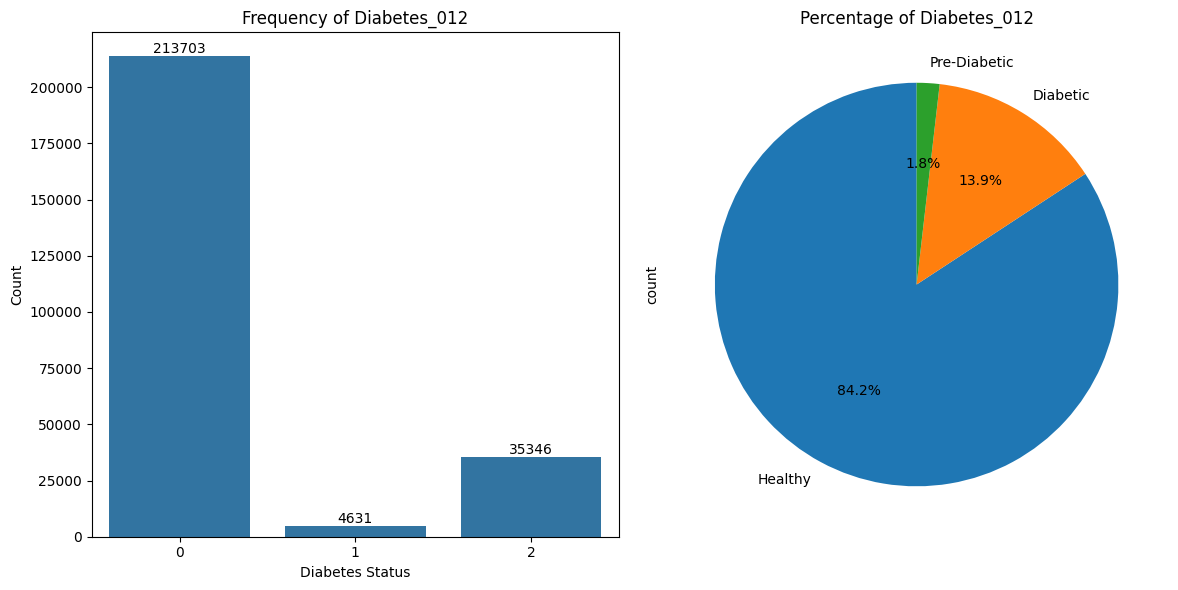

In [53]:
value_counts = df['Diabetes_012'].value_counts()
print("Value Counts of Diabetes_012:")
print(value_counts)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart (countplot) for Diabetes_012
ax =sns.countplot(x='Diabetes_012', data=df, ax=axs[0])
axs[0].set_title('Frequency of Diabetes_012')
axs[0].set_xlabel('Diabetes Status')
axs[0].set_ylabel('Count')

for container in ax.containers:
    ax.bar_label(container)

# Pie chart for the percentage of diabetic, pre-diabetic, and healthy individuals
labels = ['Healthy', 'Diabetic', 'Pre-Diabetic']
value_counts.plot.pie(labels=labels, autopct='%1.1f%%', startangle=90, ax=axs[1])
axs[1].set_title('Percentage of Diabetes_012')

plt.tight_layout()
plt.show()

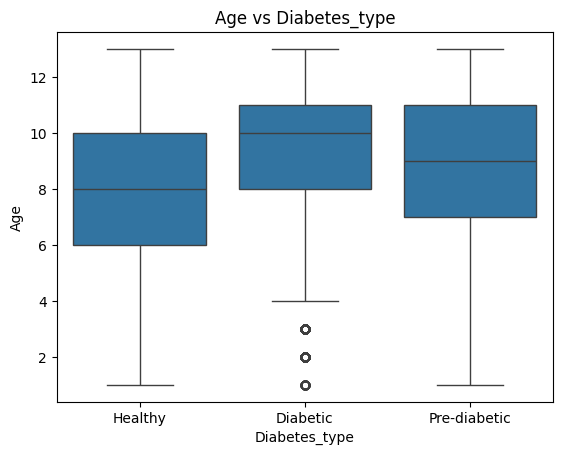

In [54]:
sns.boxplot(x = 'Diabetes_type', y = 'Age', data = df)
plt.title('Age vs Diabetes_type')
plt.show()

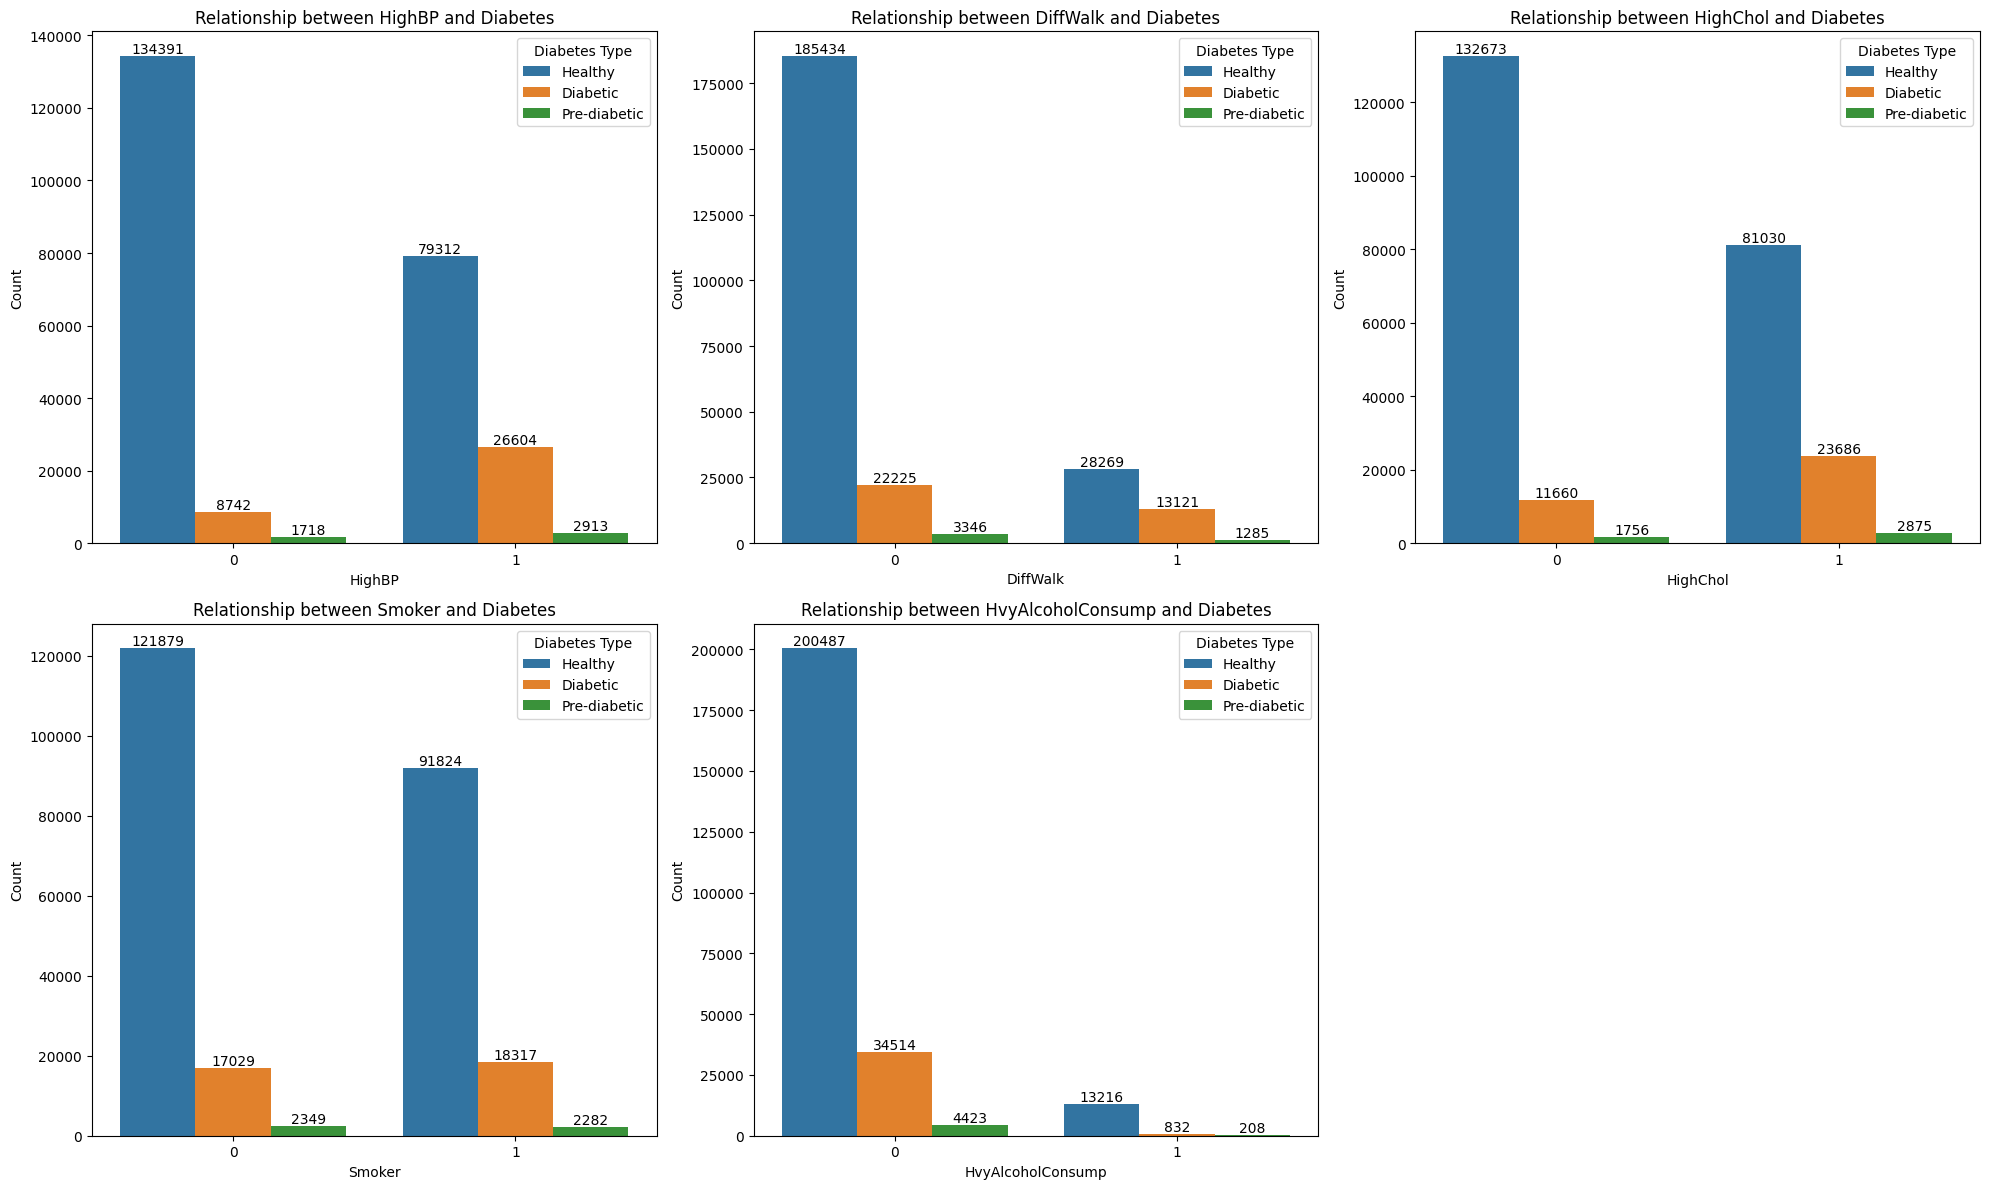

In [55]:
variables = ["HighBP", "DiffWalk", "HighChol", "Smoker", "HvyAlcoholConsump"]

plt.figure(figsize=(20, 12))

for i, variable in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    ax = sns.countplot(data=df, x=variable, hue="Diabetes_type")
    plt.title(f'Relationship between {variable} and Diabetes')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.legend(title='Diabetes Type')

    for container in ax.containers:
        ax.bar_label(container)

plt.tight_layout()
plt.show()


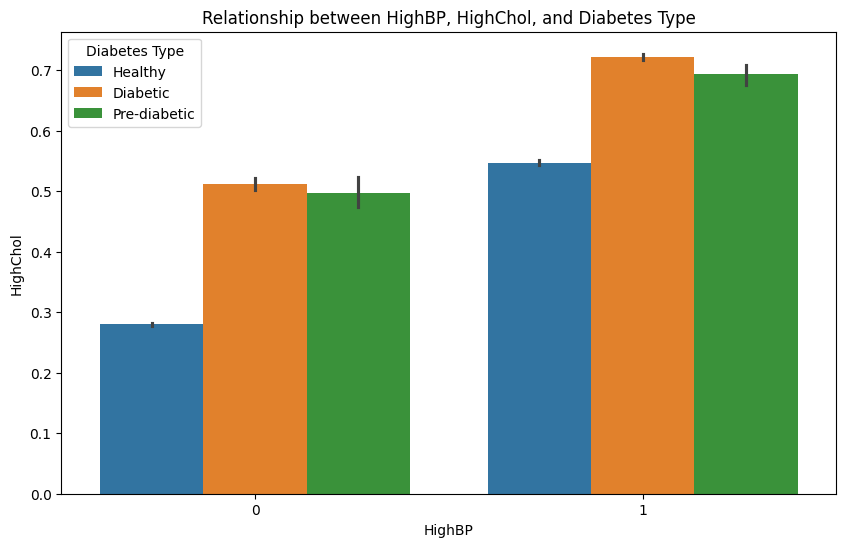

In [56]:
plt.figure(figsize=(10, 6))

# Bar plot showing the relationship between HighBP, HighChol, and Diabetes_type
sns.barplot(data=df, x='HighBP', y='HighChol', hue='Diabetes_type')
plt.title('Relationship between HighBP, HighChol, and Diabetes Type')
plt.xlabel('HighBP')
plt.ylabel('HighChol')
plt.legend(title='Diabetes Type')

plt.show()


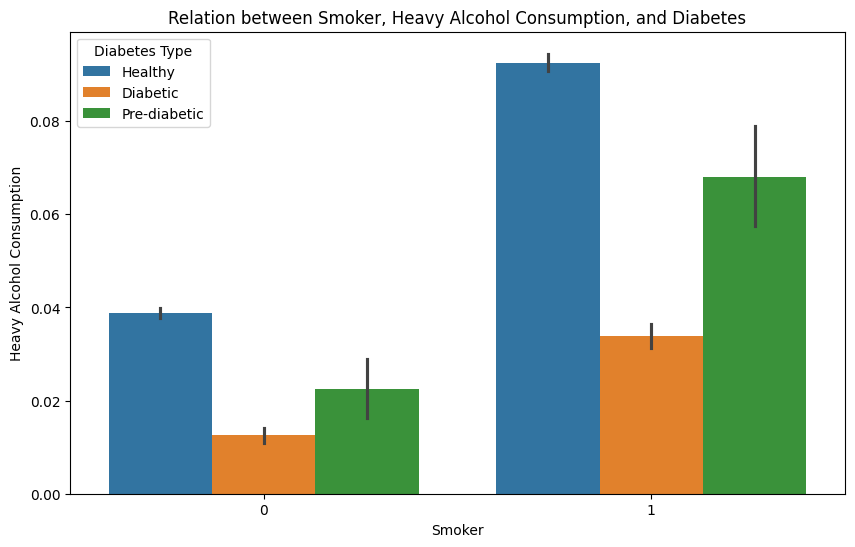

In [57]:

plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='Smoker', y='HvyAlcoholConsump', hue='Diabetes_type')
plt.title('Relation between Smoker, Heavy Alcohol Consumption, and Diabetes')
plt.xlabel('Smoker')
plt.ylabel('Heavy Alcohol Consumption')
plt.legend(title='Diabetes Type')

plt.show()

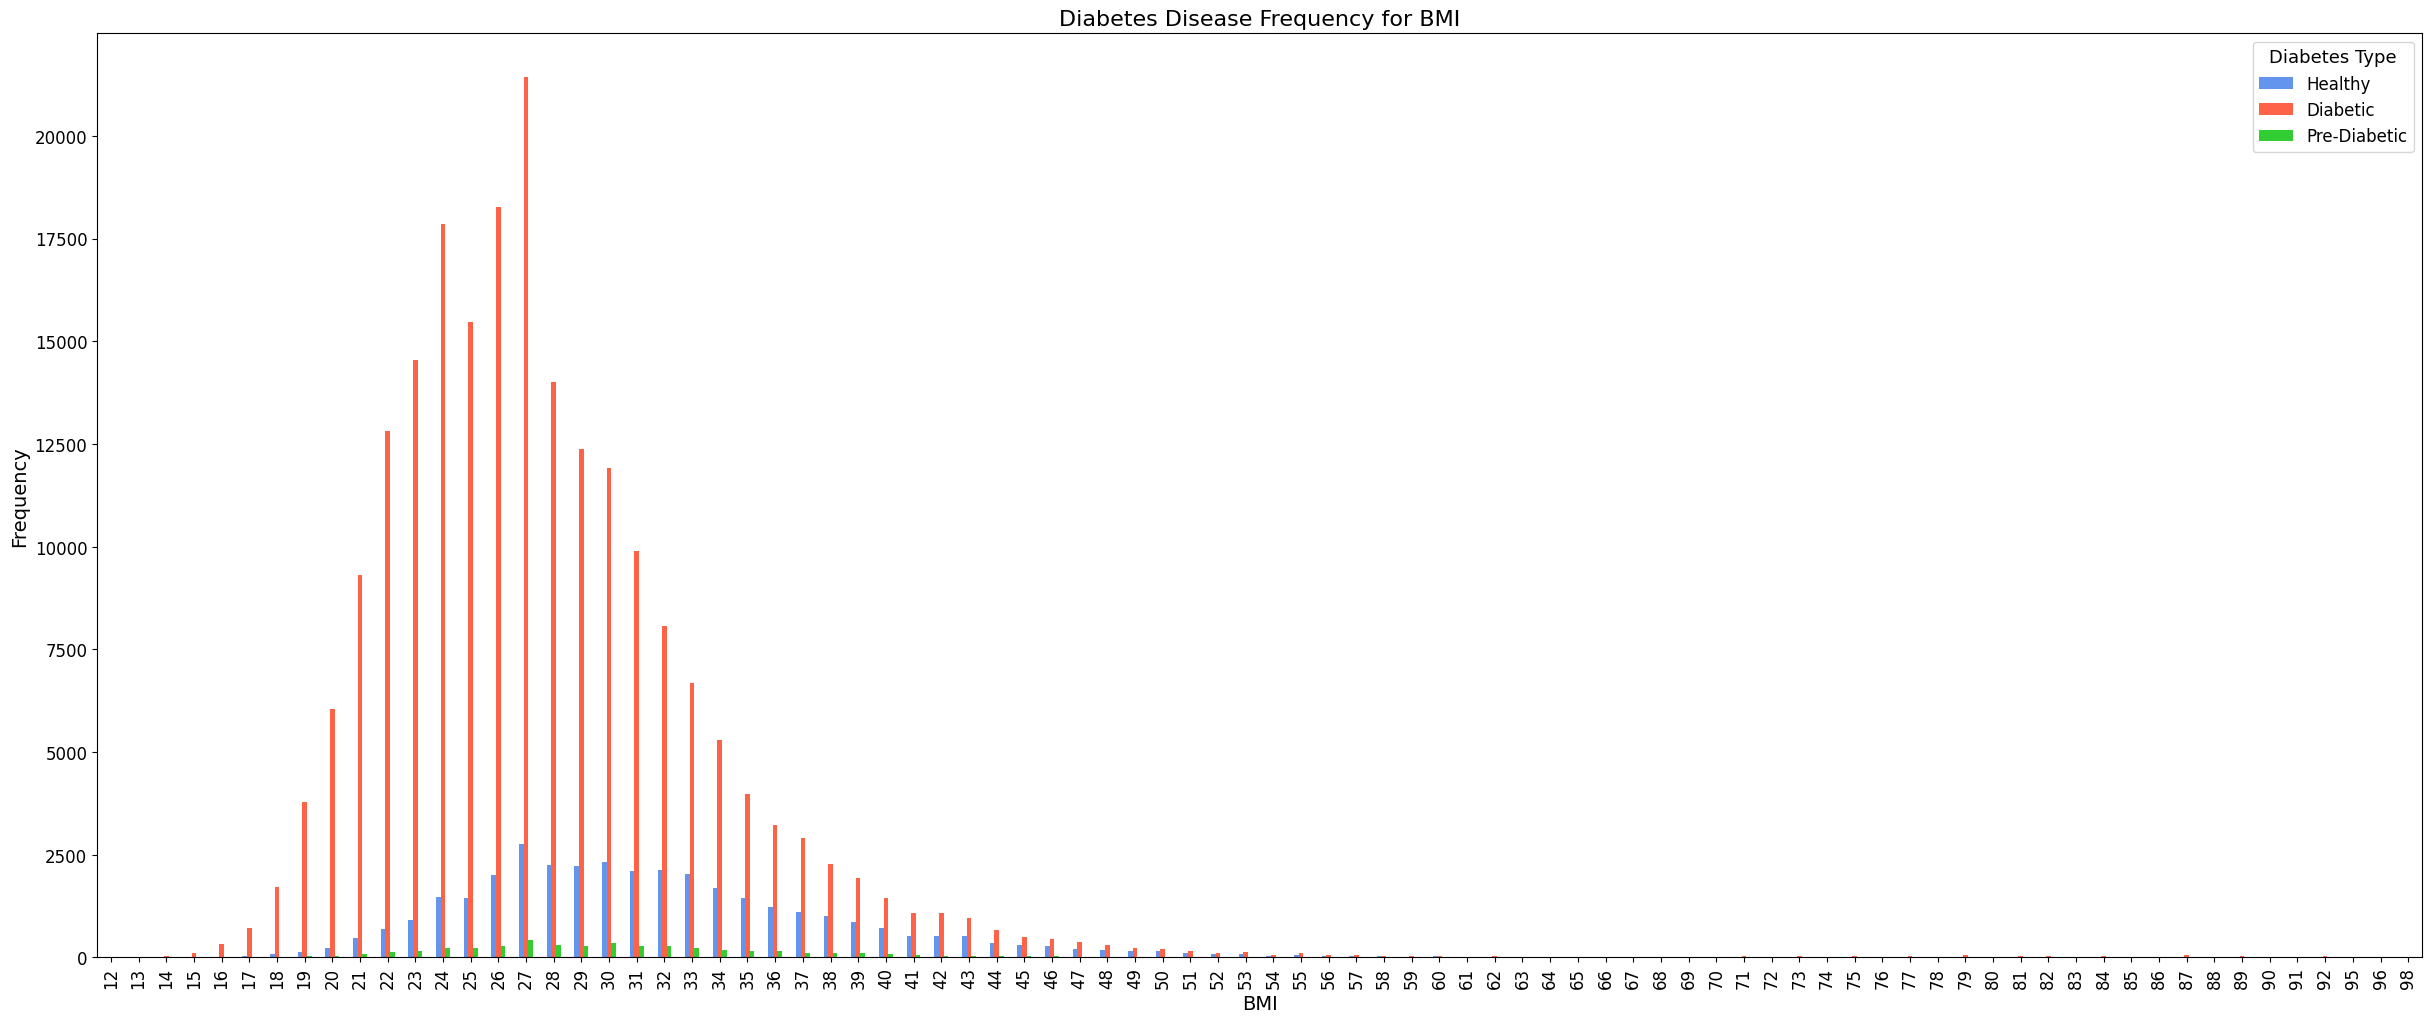

In [58]:
crosstab = pd.crosstab(df.BMI, df.Diabetes_type)

crosstab.plot(kind='bar', figsize=(30, 12), color=['#6495ED', '#FF6347', '#32CD32'])

plt.title('Diabetes Disease Frequency for BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(["Healthy", "Diabetic", "Pre-Diabetic"], title="Diabetes Type", fontsize=12, title_fontsize='13')

plt.show()

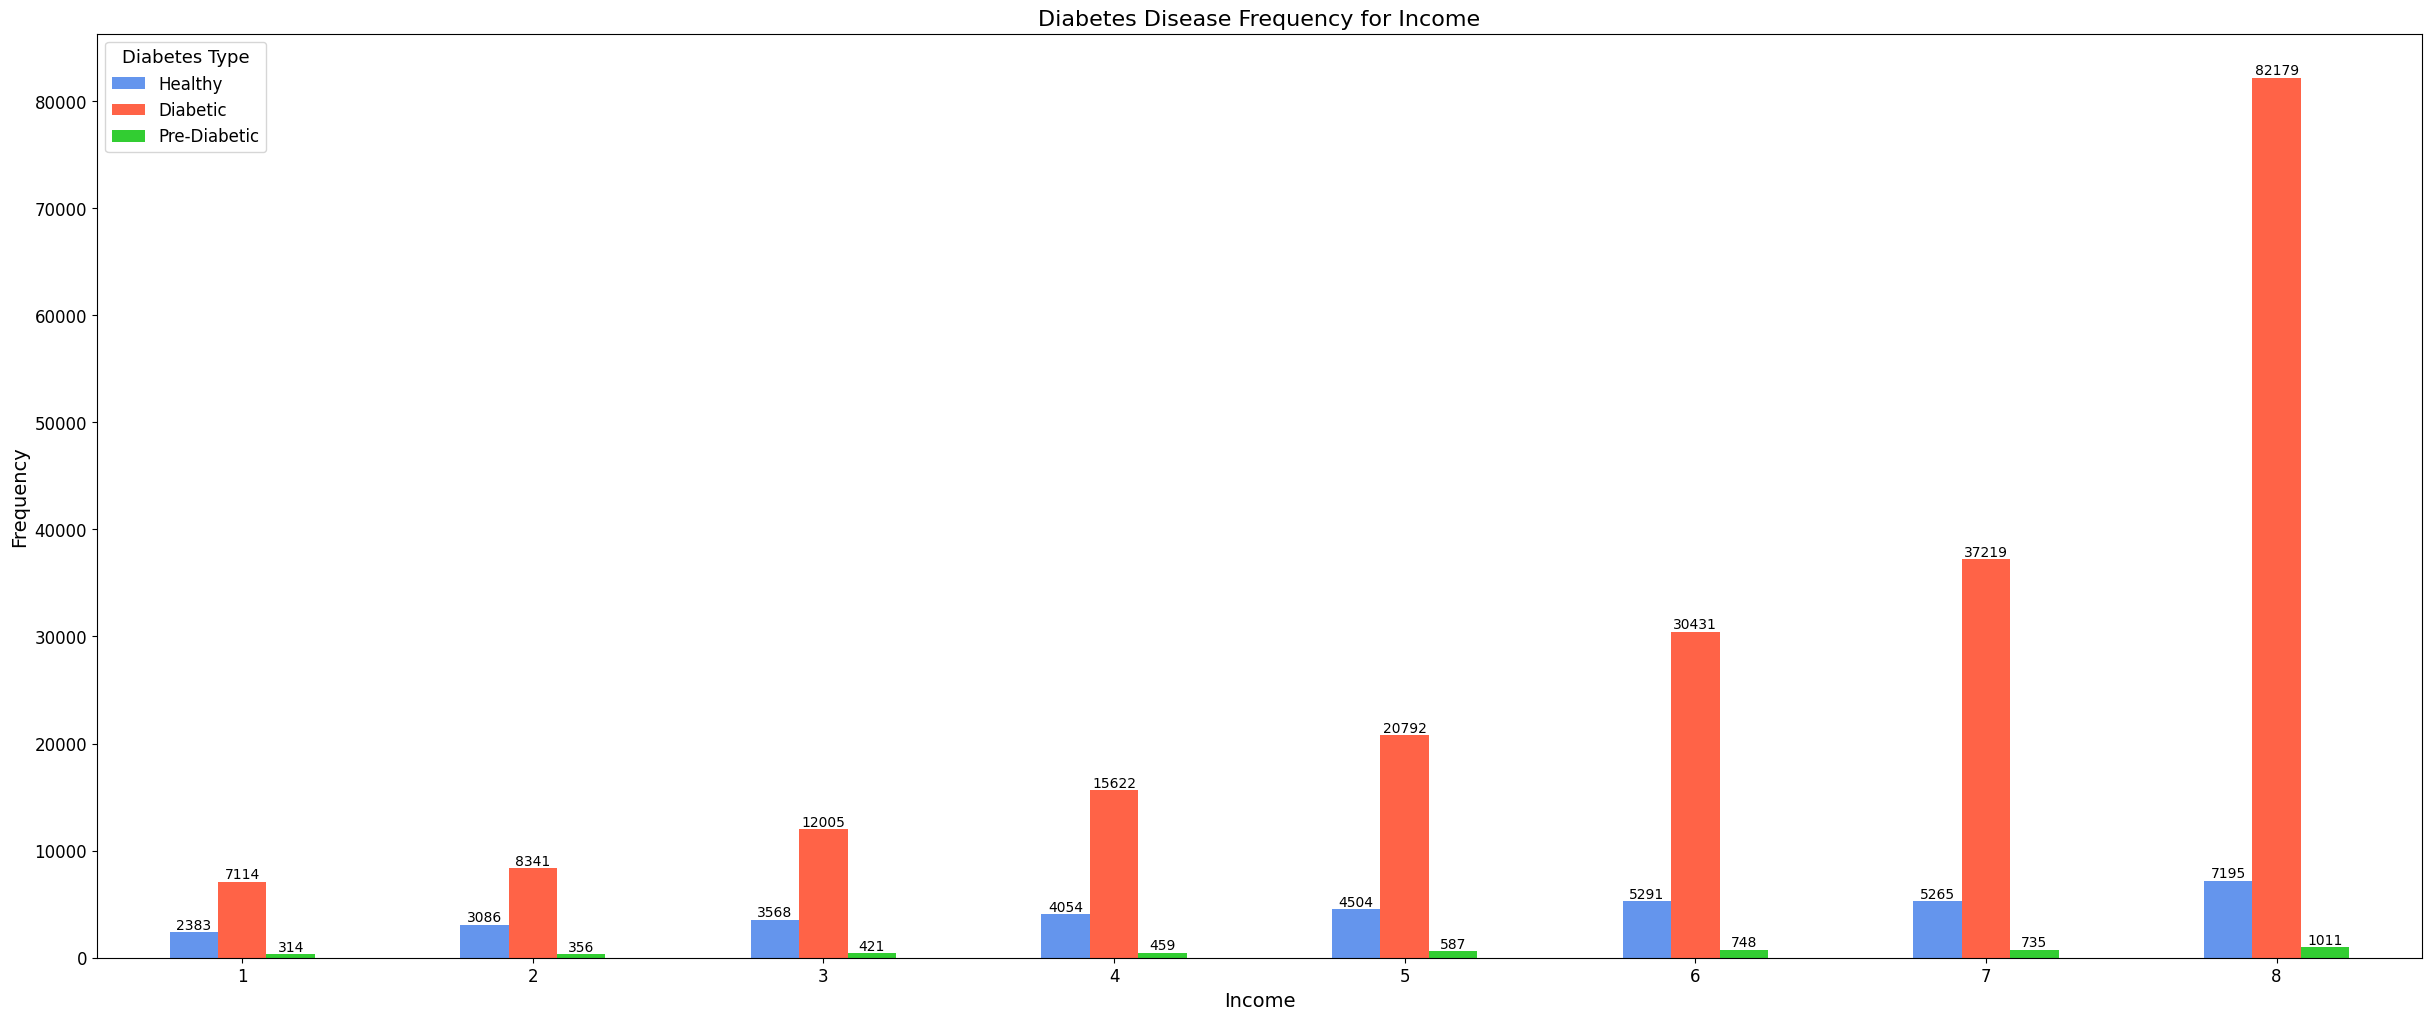

In [59]:
crosstab = pd.crosstab(df.Income, df.Diabetes_type)

ax = crosstab.plot(kind='bar', figsize=(30, 12), color=['#6495ED', '#FF6347', '#32CD32'])

plt.title('Diabetes Disease Frequency for Income', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
for container in ax.containers:
    ax.bar_label(container)
plt.legend(["Healthy", "Diabetic", "Pre-Diabetic"], title="Diabetes Type", fontsize=12, title_fontsize='13')

plt.show()

In [7]:
y = df['Diabetes_012']
X = df.drop(['Diabetes_012'], axis=1)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [8]:
# Train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_dt = dt_classifier.predict(X_val)

# Evaluate model performance on the validation set
accuracy_val_dt1 = accuracy_score(y_val, y_pred_val_dt)
report_val_dt = classification_report(y_val, y_pred_val_dt, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set
class_label = '2'
precision_val_dt1 = report_val_dt[class_label]['precision']
recall_val_dt1 = report_val_dt[class_label]['recall']
f1_score_val_dt1 = report_val_dt[class_label]['f1-score']
support_val_dt1 = report_val_dt[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set:")
print(f"  Accuracy: {accuracy_val_dt1:.2f}")
print(f"  Precision: {precision_val_dt1:.2f}")
print(f"  Recall: {recall_val_dt1:.2f}")
print(f"  F1-Score: {f1_score_val_dt1:.2f}")

# Make predictions on the test set
y_pred_test_dt = dt_classifier.predict(X_test)

# Evaluate model performance on the test set
accuracy_test_dt1 = accuracy_score(y_test, y_pred_test_dt)
report_test_dt = classification_report(y_test, y_pred_test_dt, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_dt1 = report_test_dt[class_label]['precision']
recall_test_dt1 = report_test_dt[class_label]['recall']
f1_score_test_dt1 = report_test_dt[class_label]['f1-score']
support_test_dt1 = report_test_dt[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set:")
print(f"  Accuracy: {accuracy_test_dt1:.2f}")
print(f"  Precision: {precision_test_dt1:.2f}")
print(f"  Recall: {recall_test_dt1:.2f}")
print(f"  F1-Score: {f1_score_test_dt1:.2f}")



Classification Report for Class Diabetic on Validation Set:
  Accuracy: 0.77
  Precision: 0.29
  Recall: 0.33
  F1-Score: 0.31

Classification Report for Class Diabetic on Test Set:
  Accuracy: 0.77
  Precision: 0.29
  Recall: 0.32
  F1-Score: 0.30


In [9]:
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_gnb = clf.predict(X_val)

# Evaluate model performance on the validation set
accuracy_val_gnb1 = accuracy_score(y_val, y_pred_val_gnb)
report_val_gnb = classification_report(y_val, y_pred_val_gnb, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set
class_label = '2'
precision_val_gnb1 = report_val_gnb[class_label]['precision']
recall_val_gnb1 = report_val_gnb[class_label]['recall']
f1_score_val_gnb1 = report_val_gnb[class_label]['f1-score']
support_val_gnb1 = report_val_gnb[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set (Naive Bayes):")
print(f"  Accuracy: {accuracy_val_gnb1:.2f}")
print(f"  Precision: {precision_val_gnb1:.2f}")
print(f"  Recall: {recall_val_gnb1:.2f}")
print(f"  F1-Score: {f1_score_val_gnb1:.2f}")

# Make predictions on the test set
y_pred_test_gnb = clf.predict(X_test)

# Evaluate model performance on the test set
accuracy_test_gnb1 = accuracy_score(y_test, y_pred_test_gnb)
report_test_gnb = classification_report(y_test, y_pred_test_gnb, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_gnb1 = report_test_gnb[class_label]['precision']
recall_test_gnb1 = report_test_gnb[class_label]['recall']
f1_score_test_gnb1 = report_test_gnb[class_label]['f1-score']
support_test_gnb1 = report_test_gnb[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set (Naive Bayes):")
print(f"  Accuracy: {accuracy_test_gnb1:.2f}")
print(f"  Precision: {precision_test_gnb1:.2f}")
print(f"  Recall: {recall_test_gnb1:.2f}")
print(f"  F1-Score: {f1_score_test_gnb1:.2f}")



Classification Report for Class Diabetic on Validation Set (Naive Bayes):
  Accuracy: 0.75
  Precision: 0.32
  Recall: 0.57
  F1-Score: 0.41

Classification Report for Class Diabetic on Test Set (Naive Bayes):
  Accuracy: 0.76
  Precision: 0.32
  Recall: 0.55
  F1-Score: 0.40


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X is your features and y is your target variable
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_knn = knn_model.predict(X_val)

# Evaluate model performance on the validation set
accuracy_val_knn1 = accuracy_score(y_val, y_pred_val_knn)
report_val_knn = classification_report(y_val, y_pred_val_knn, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set (assuming class label '2')
class_label = '2'
precision_val_knn1 = report_val_knn[class_label]['precision']
recall_val_knn1 = report_val_knn[class_label]['recall']
f1_score_val_knn1 = report_val_knn[class_label]['f1-score']
support_val_knn1 = report_val_knn[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set (KNN):")
print(f"  Accuracy: {accuracy_val_knn1:.2f}")
print(f"  Precision: {precision_val_knn1:.2f}")
print(f"  Recall: {recall_val_knn1:.2f}")
print(f"  F1-Score: {f1_score_val_knn1:.2f}")

# Make predictions on the test set
y_pred_test_knn = knn_model.predict(X_test)

# Evaluate model performance on the test set
accuracy_test_knn1 = accuracy_score(y_test, y_pred_test_knn)
report_test_knn = classification_report(y_test, y_pred_test_knn, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_knn1 = report_test_knn[class_label]['precision']
recall_test_knn1 = report_test_knn[class_label]['recall']
f1_score_test_knn1 = report_test_knn[class_label]['f1-score']
support_test_knn1 = report_test_knn[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set (KNN):")
print(f"  Accuracy: {accuracy_test_knn1:.2f}")
print(f"  Precision: {precision_test_knn1:.2f}")
print(f"  Recall: {recall_test_knn1:.2f}")
print(f"  F1-Score: {f1_score_test_knn1:.2f}")



Classification Report for Class Diabetic on Validation Set (KNN):
  Accuracy: 0.83
  Precision: 0.40
  Recall: 0.19
  F1-Score: 0.26

Classification Report for Class Diabetic on Test Set (KNN):
  Accuracy: 0.83
  Precision: 0.41
  Recall: 0.20
  F1-Score: 0.27


In [11]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_rf = rf_classifier.predict(X_val)

# Evaluate model performance on the validation set
accuracy_val_rf1 = accuracy_score(y_val, y_pred_val_rf)
report_val_rf = classification_report(y_val, y_pred_val_rf, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set
class_label = '2'
precision_val_rf1 = report_val_rf[class_label]['precision']
recall_val_rf1 = report_val_rf[class_label]['recall']
f1_score_val_rf1 = report_val_rf[class_label]['f1-score']
support_val_rf1 = report_val_rf[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set (Random Forest):")
print(f"  Accuracy: {accuracy_val_rf1:.2f}")
print(f"  Precision: {precision_val_rf1:.2f}")
print(f"  Recall: {recall_val_rf1:.2f}")
print(f"  F1-Score: {f1_score_val_rf1:.2f}")

# Make predictions on the test set
y_pred_test_rf = rf_classifier.predict(X_test)

# Evaluate model performance on the test set
accuracy_test_rf1 = accuracy_score(y_test, y_pred_test_rf)
report_test_rf = classification_report(y_test, y_pred_test_rf, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_rf1 = report_test_rf[class_label]['precision']
recall_test_rf1 = report_test_rf[class_label]['recall']
f1_score_test_rf1 = report_test_rf[class_label]['f1-score']
support_test_rf1 = report_test_rf[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set (Random Forest):")
print(f"  Accuracy: {accuracy_test_rf1:.2f}")
print(f"  Precision: {precision_test_rf1:.2f}")
print(f"  Recall: {recall_test_rf1:.2f}")
print(f"  F1-Score: {f1_score_test_rf1:.2f}")



Classification Report for Class Diabetic on Validation Set (Random Forest):
  Accuracy: 0.84
  Precision: 0.49
  Recall: 0.20
  F1-Score: 0.29

Classification Report for Class Diabetic on Test Set (Random Forest):
  Accuracy: 0.84
  Precision: 0.49
  Recall: 0.20
  F1-Score: 0.29


In [15]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
nn_model = MLPClassifier(solver='lbfgs', random_state=42)  # Adjust parameters as needed

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_val_nn = nn_model.predict(X_val_scaled)

# Evaluate model performance on the validation set
accuracy_val_nn1 = accuracy_score(y_val, y_pred_val_nn)
report_val_nn = classification_report(y_val, y_pred_val_nn, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set
class_label = '2'
precision_val_nn1 = report_val_nn[class_label]['precision']
recall_val_nn1 = report_val_nn[class_label]['recall']
f1_score_val_nn1 = report_val_nn[class_label]['f1-score']
support_val_nn1 = report_val_nn[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set:")
print(f"  Accuracy: {accuracy_val_nn1:.2f}")
print(f"  Precision: {precision_val_nn1:.2f}")
print(f"  Recall: {recall_val_nn1:.2f}")
print(f"  F1-Score: {f1_score_val_nn1:.2f}")

# Make predictions on the test set
y_pred_test_nn = nn_model.predict(X_test_scaled)

# Evaluate model performance on the test set
accuracy_test_nn1 = accuracy_score(y_test, y_pred_test_nn)
report_test_nn = classification_report(y_test, y_pred_test_nn, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_nn1 = report_test_nn[class_label]['precision']
recall_test_nn1 = report_test_nn[class_label]['recall']
f1_score_test_nn1 = report_test_nn[class_label]['f1-score']
support_test_nn1 = report_test_nn[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set:")
print(f"  Accuracy: {accuracy_test_nn1:.2f}")
print(f"  Precision: {precision_test_nn1:.2f}")
print(f"  Recall: {recall_test_nn1:.2f}")
print(f"  F1-Score: {f1_score_test_nn1:.2f}")



Classification Report for Class Diabetic on Validation Set:
  Accuracy: 0.85
  Precision: 0.52
  Recall: 0.20
  F1-Score: 0.29

Classification Report for Class Diabetic on Test Set:
  Accuracy: 0.85
  Precision: 0.52
  Recall: 0.21
  F1-Score: 0.30


In [16]:
results = {
    'Model': ['Decision Tree Classifier','Random Forest', 'KNN', 'Naive Bayes','MLP'],
    'Validation Accuracy': [accuracy_val_dt1,accuracy_val_rf1, accuracy_val_knn1, accuracy_val_gnb1,accuracy_val_nn1],
    'Validation Precision': [precision_val_dt1,precision_val_rf1, precision_val_knn1, precision_val_gnb1,precision_val_nn1],
    'Validation Recall': [recall_val_dt1,recall_val_rf1, recall_val_knn1, recall_val_gnb1,recall_val_nn1],
    'Validation F1-Score': [f1_score_val_dt1,f1_score_val_rf1, f1_score_val_knn1, f1_score_val_gnb1,f1_score_val_nn1],
    'Test Accuracy': [accuracy_test_dt1,accuracy_test_rf1, accuracy_test_knn1, accuracy_test_gnb1,accuracy_test_nn1],
    'Test Precision': [precision_test_dt1,precision_test_rf1, precision_test_knn1, precision_test_gnb1,precision_test_nn1],
    'Test Recall': [recall_test_dt1,recall_test_rf1, recall_test_knn1, recall_test_gnb1, recall_test_nn1],
    'Test F1-Score': [f1_score_test_dt1,f1_score_test_rf1, f1_score_test_knn1, f1_score_test_gnb1, f1_score_test_nn1]
}
df_no_presprocessing = pd.DataFrame(results)
df_no_presprocessing

,Model,Validation Accuracy,Validation Precision,Validation Recall,Validation F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score
0,Decision Tree Classifier,0.765236,0.294407,0.328868,0.310685,0.766793,0.285714,0.316396,0.300273
1,Random Forest,0.843543,0.494571,0.200597,0.285426,0.844016,0.491454,0.201372,0.285685
2,KNN,0.832072,0.402369,0.188237,0.256485,0.832742,0.407549,0.197513,0.266076
3,Naive Bayes,0.753193,0.322033,0.569313,0.411372,0.756504,0.316907,0.554484,0.403309
4,MLP,0.847229,0.521819,0.202159,0.291419,0.848214,0.522393,0.213377,0.302993


In [17]:
df.isnull().sum()

,0
Diabetes_012,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [18]:
duplicates = df[df.duplicated()]
print(len(duplicates))

23899


In [19]:
df.drop_duplicates(inplace = True)

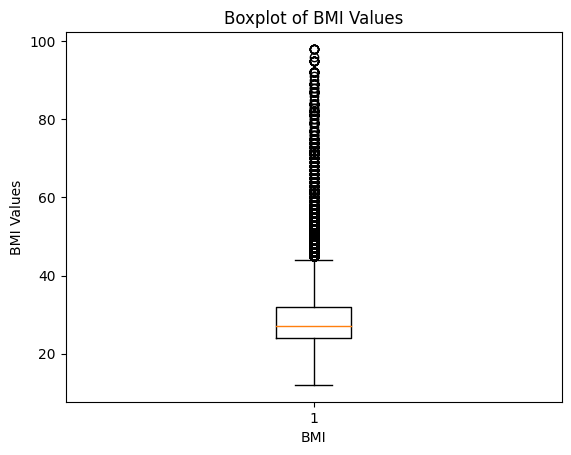

In [20]:
plt.boxplot(df["BMI"])

plt.xlabel("BMI")
plt.ylabel("BMI Values")
plt.title("Boxplot of BMI Values")

plt.show()

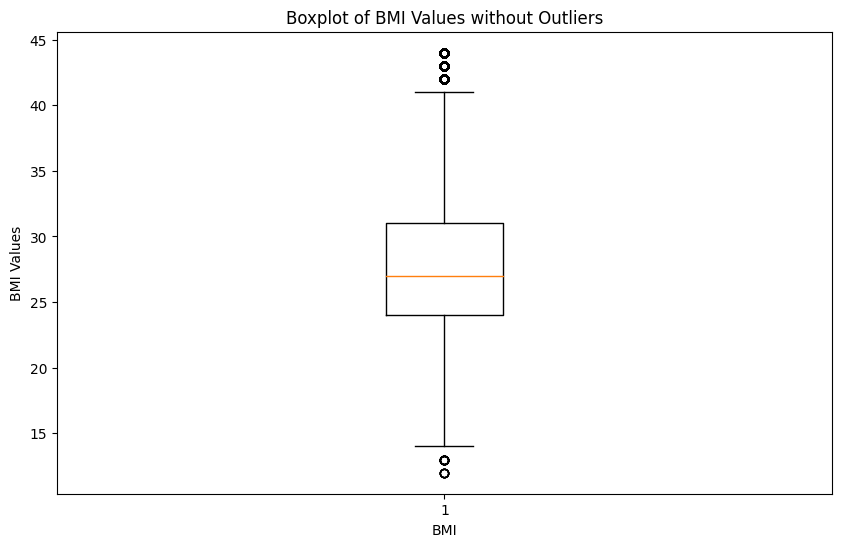

In [21]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

plt.figure(figsize=(10, 6))
plt.boxplot(df["BMI"])
plt.xlabel("BMI")
plt.ylabel("BMI Values")
plt.title("Boxplot of BMI Values without Outliers")
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lasso Regression for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
print("Lasso Regression Coefficients:\n", lasso_coefficients)

selected_features_lasso = lasso_coefficients[lasso_coefficients != 0].index.tolist()
print("Selected Features by Lasso:\n", selected_features_lasso)

# Ridge Regression for feature importance
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

ridge_coefficients = pd.Series(ridge.coef_, index=X.columns)
print("Ridge Regression Coefficients:\n", ridge_coefficients)

# Evaluate the models
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Mean Squared Error for Lasso:", mse_lasso)
print("Mean Squared Error for Ridge:", mse_ridge)


Lasso Regression Coefficients:
 HighBP                  0.053520
HighChol                0.009634
CholCheck               0.000000
BMI                     0.028849
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity           -0.000000
Fruits                 -0.000000
Veggies                -0.000000
HvyAlcoholConsump      -0.000000
AnyHealthcare           0.000000
NoDocbcCost             0.000000
GenHlth                 0.075431
MentHlth                0.000000
PhysHlth                0.000000
DiffWalk                0.000000
Sex                     0.000000
Age                     0.003548
Education              -0.000000
Income                 -0.000000
dtype: float64
Selected Features by Lasso:
 ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age']
Ridge Regression Coefficients:
 HighBP                  0.075410
HighChol                0.060004
CholCheck               0.019046
BMI                     0.103110
Smoker             

In [23]:
scaler = StandardScaler()

# Fit and transform the scaler on the numerical features
df[['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age']] = scaler.fit_transform(df[['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age']])

print(df[['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age']].count())

HighBP      224143
HighChol    224143
BMI         224143
GenHlth     224143
Age         224143
dtype: int64


In [24]:
y = df['Diabetes_012']
X = df[['HighBP', 'HighChol', 'BMI', 'GenHlth', 'Age']]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [25]:
# Train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_dt = dt_classifier.predict(X_val)

# Evaluate model performance on the validation set
accuracy_val_dt2 = accuracy_score(y_val, y_pred_val_dt)
report_val_dt = classification_report(y_val, y_pred_val_dt, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set
class_label = '2'
precision_val_dt2 = report_val_dt[class_label]['precision']
recall_val_dt2 = report_val_dt[class_label]['recall']
f1_score_val_dt2 = report_val_dt[class_label]['f1-score']
support_val_dt2 = report_val_dt[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set:")
print(f"  Accuracy: {accuracy_val_dt2:.2f}")
print(f"  Precision: {precision_val_dt2:.2f}")
print(f"  Recall: {recall_val_dt2:.2f}")
print(f"  F1-Score: {f1_score_val_dt2:.2f}")

# Make predictions on the test set
y_pred_test_dt = dt_classifier.predict(X_test)

# Evaluate model performance on the test set
accuracy_test_dt2 = accuracy_score(y_test, y_pred_test_dt)
report_test_dt = classification_report(y_test, y_pred_test_dt, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_dt2 = report_test_dt[class_label]['precision']
recall_test_dt2 = report_test_dt[class_label]['recall']
f1_score_test_dt2 = report_test_dt[class_label]['f1-score']
support_test_dt2 = report_test_dt[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set:")
print(f"  Accuracy: {accuracy_test_dt2:.2f}")
print(f"  Precision: {precision_test_dt2:.2f}")
print(f"  Recall: {recall_test_dt2:.2f}")
print(f"  F1-Score: {f1_score_test_dt2:.2f}")



Classification Report for Class Diabetic on Validation Set:
  Accuracy: 0.83
  Precision: 0.49
  Recall: 0.15
  F1-Score: 0.22

Classification Report for Class Diabetic on Test Set:
  Accuracy: 0.83
  Precision: 0.50
  Recall: 0.15
  F1-Score: 0.23


In [26]:
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_gnb = clf.predict(X_val)

# Evaluate model performance on the validation set
accuracy_val_gnb2 = accuracy_score(y_val, y_pred_val_gnb)
report_val_gnb = classification_report(y_val, y_pred_val_gnb, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set
class_label = '2'
precision_val_gnb2 = report_val_gnb[class_label]['precision']
recall_val_gnb2 = report_val_gnb[class_label]['recall']
f1_score_val_gnb2 = report_val_gnb[class_label]['f1-score']
support_val_gnb2 = report_val_gnb[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set (Naive Bayes):")
print(f"  Accuracy: {accuracy_val_gnb2:.2f}")
print(f"  Precision: {precision_val_gnb2:.2f}")
print(f"  Recall: {recall_val_gnb2:.2f}")
print(f"  F1-Score: {f1_score_val_gnb2:.2f}")

# Make predictions on the test set
y_pred_test_gnb = clf.predict(X_test)

# Evaluate model performance on the test set
accuracy_test_gnb2 = accuracy_score(y_test, y_pred_test_gnb)
report_test_gnb = classification_report(y_test, y_pred_test_gnb, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_gnb2 = report_test_gnb[class_label]['precision']
recall_test_gnb2 = report_test_gnb[class_label]['recall']
f1_score_test_gnb2 = report_test_gnb[class_label]['f1-score']
support_test_gnb2 = report_test_gnb[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set (Naive Bayes):")
print(f"  Accuracy: {accuracy_test_gnb2:.2f}")
print(f"  Precision: {precision_test_gnb2:.2f}")
print(f"  Recall: {recall_test_gnb2:.2f}")
print(f"  F1-Score: {f1_score_test_gnb2:.2f}")



Classification Report for Class Diabetic on Validation Set (Naive Bayes):
  Accuracy: 0.82
  Precision: 0.42
  Recall: 0.40
  F1-Score: 0.41

Classification Report for Class Diabetic on Test Set (Naive Bayes):
  Accuracy: 0.82
  Precision: 0.42
  Recall: 0.40
  F1-Score: 0.41


In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming X is your features and y is your target variable
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_knn = knn_model.predict(X_val)

# Evaluate model performance on the validation set
accuracy_val_knn2 = accuracy_score(y_val, y_pred_val_knn)
report_val_knn = classification_report(y_val, y_pred_val_knn, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set (assuming class label '2')
class_label = '2'
precision_val_knn2 = report_val_knn[class_label]['precision']
recall_val_knn2 = report_val_knn[class_label]['recall']
f1_score_val_knn2 = report_val_knn[class_label]['f1-score']
support_val_knn2 = report_val_knn[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set (KNN):")
print(f"  Accuracy: {accuracy_val_knn2:.2f}")
print(f"  Precision: {precision_val_knn2:.2f}")
print(f"  Recall: {recall_val_knn2:.2f}")
print(f"  F1-Score: {f1_score_val_knn2:.2f}")

# Make predictions on the test set
y_pred_test_knn = knn_model.predict(X_test)

# Evaluate model performance on the test set
accuracy_test_knn2 = accuracy_score(y_test, y_pred_test_knn)
report_test_knn = classification_report(y_test, y_pred_test_knn, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_knn2 = report_test_knn[class_label]['precision']
recall_test_knn2 = report_test_knn[class_label]['recall']
f1_score_test_knn2 = report_test_knn[class_label]['f1-score']
support_test_knn2 = report_test_knn[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set (KNN):")
print(f"  Accuracy: {accuracy_test_knn2:.2f}")
print(f"  Precision: {precision_test_knn2:.2f}")
print(f"  Recall: {recall_test_knn2:.2f}")
print(f"  F1-Score: {f1_score_test_knn2:.2f}")



Classification Report for Class Diabetic on Validation Set (KNN):
  Accuracy: 0.82
  Precision: 0.42
  Recall: 0.20
  F1-Score: 0.27

Classification Report for Class Diabetic on Test Set (KNN):
  Accuracy: 0.82
  Precision: 0.40
  Recall: 0.19
  F1-Score: 0.26


In [28]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_val_rf = rf_classifier.predict(X_val)

# Evaluate model performance on the validation set
accuracy_val_rf2 = accuracy_score(y_val, y_pred_val_rf)
report_val_rf = classification_report(y_val, y_pred_val_rf, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set
class_label = '2'
precision_val_rf2 = report_val_rf[class_label]['precision']
recall_val_rf2 = report_val_rf[class_label]['recall']
f1_score_val_rf2 = report_val_rf[class_label]['f1-score']
support_val_rf2 = report_val_rf[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set (Random Forest):")
print(f"  Accuracy: {accuracy_val_rf2:.2f}")
print(f"  Precision: {precision_val_rf2:.2f}")
print(f"  Recall: {recall_val_rf2:.2f}")
print(f"  F1-Score: {f1_score_val_rf2:.2f}")

# Make predictions on the test set
y_pred_test_rf = rf_classifier.predict(X_test)

# Evaluate model performance on the test set
accuracy_test_rf2 = accuracy_score(y_test, y_pred_test_rf)
report_test_rf = classification_report(y_test, y_pred_test_rf, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_rf2 = report_test_rf[class_label]['precision']
recall_test_rf2 = report_test_rf[class_label]['recall']
f1_score_test_rf2 = report_test_rf[class_label]['f1-score']
support_test_rf2 = report_test_rf[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set (Random Forest):")
print(f"  Accuracy: {accuracy_test_rf2:.2f}")
print(f"  Precision: {precision_test_rf2:.2f}")
print(f"  Recall: {recall_test_rf2:.2f}")
print(f"  F1-Score: {f1_score_test_rf2:.2f}")



Classification Report for Class Diabetic on Validation Set (Random Forest):
  Accuracy: 0.83
  Precision: 0.48
  Recall: 0.17
  F1-Score: 0.25

Classification Report for Class Diabetic on Test Set (Random Forest):
  Accuracy: 0.83
  Precision: 0.47
  Recall: 0.16
  F1-Score: 0.24


In [29]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network model
nn_model = MLPClassifier(solver='lbfgs', random_state=42)  # Adjust parameters as needed

# Train the model
nn_model.fit(X_train_scaled, y_train)

# Make predictions on the validation set
y_pred_val_nn = nn_model.predict(X_val_scaled)

# Evaluate model performance on the validation set
accuracy_val_nn2 = accuracy_score(y_val, y_pred_val_nn)
report_val_nn = classification_report(y_val, y_pred_val_nn, output_dict=True)

# Access metrics for the 'Diabetic' class on validation set
class_label = '2'
precision_val_nn2 = report_val_nn[class_label]['precision']
recall_val_nn2 = report_val_nn[class_label]['recall']
f1_score_val_nn2 = report_val_nn[class_label]['f1-score']
support_val_nn2 = report_val_nn[class_label]['support']

# Print the report for the 'Diabetic' class on validation set
print(f"\nClassification Report for Class Diabetic on Validation Set:")
print(f"  Accuracy: {accuracy_val_nn2:.2f}")
print(f"  Precision: {precision_val_nn2:.2f}")
print(f"  Recall: {recall_val_nn2:.2f}")
print(f"  F1-Score: {f1_score_val_nn2:.2f}")

# Make predictions on the test set
y_pred_test_nn = nn_model.predict(X_test_scaled)

# Evaluate model performance on the test set
accuracy_test_nn2 = accuracy_score(y_test, y_pred_test_nn)
report_test_nn = classification_report(y_test, y_pred_test_nn, output_dict=True)

# Access metrics for the 'Diabetic' class on test set
precision_test_nn2 = report_test_nn[class_label]['precision']
recall_test_nn2 = report_test_nn[class_label]['recall']
f1_score_test_nn2 = report_test_nn[class_label]['f1-score']
support_test_nn2 = report_test_nn[class_label]['support']

# Print the report for the 'Diabetic' class on test set
print(f"\nClassification Report for Class Diabetic on Test Set:")
print(f"  Accuracy: {accuracy_test_nn2:.2f}")
print(f"  Precision: {precision_test_nn2:.2f}")
print(f"  Recall: {recall_test_nn2:.2f}")
print(f"  F1-Score: {f1_score_test_nn2:.2f}")



Classification Report for Class Diabetic on Validation Set:
  Accuracy: 0.84
  Precision: 0.55
  Recall: 0.14
  F1-Score: 0.22

Classification Report for Class Diabetic on Test Set:
  Accuracy: 0.84
  Precision: 0.56
  Recall: 0.13
  F1-Score: 0.21


In [30]:
results = {
    'Model': ['Decision Tree Classifier','Random Forest', 'KNN', 'Naive Bayes','MLP'],
    'Validation Accuracy': [accuracy_val_dt2,accuracy_val_rf2, accuracy_val_knn2, accuracy_val_gnb2,accuracy_val_nn2],
    'Validation Precision': [precision_val_dt2,precision_val_rf2, precision_val_knn2, precision_val_gnb2,precision_val_nn2],
    'Validation Recall': [recall_val_dt2,recall_val_rf2, recall_val_knn2, recall_val_gnb2,recall_val_nn2],
    'Validation F1-Score': [f1_score_val_dt2,f1_score_val_rf2, f1_score_val_knn2, f1_score_val_gnb2,f1_score_val_nn2],
    'Test Accuracy': [accuracy_test_dt2,accuracy_test_rf2, accuracy_test_knn2, accuracy_test_gnb2,accuracy_test_nn2],
    'Test Precision': [precision_test_dt2,precision_test_rf2, precision_test_knn2, precision_test_gnb2,precision_test_nn2],
    'Test Recall': [recall_test_dt2,recall_test_rf2, recall_test_knn2, recall_test_gnb2,recall_test_nn2],
    'Test F1-Score': [f1_score_test_dt2,f1_score_test_rf2, f1_score_test_knn2, f1_score_test_gnb2,f1_score_test_nn2]
}
df_after_presprocessing = pd.DataFrame(results)
df_after_presprocessing

,Model,Validation Accuracy,Validation Precision,Validation Recall,Validation F1-Score,Test Accuracy,Test Precision,Test Recall,Test F1-Score
0,Decision Tree Classifier,0.833724,0.490026,0.145284,0.224120,0.834951,0.497698,0.147134,0.227124
1,Random Forest,0.831939,0.481338,0.169897,0.251147,0.831359,0.466935,0.158142,0.236265
2,KNN,0.822169,0.419508,0.201242,0.272002,0.821856,0.404723,0.186743,0.255566
3,Naive Bayes,0.815298,0.418253,0.403094,0.410534,0.816614,0.422050,0.404053,0.412855
4,MLP,0.837226,0.549878,0.136887,0.219205,0.838720,0.556962,0.133172,0.214949


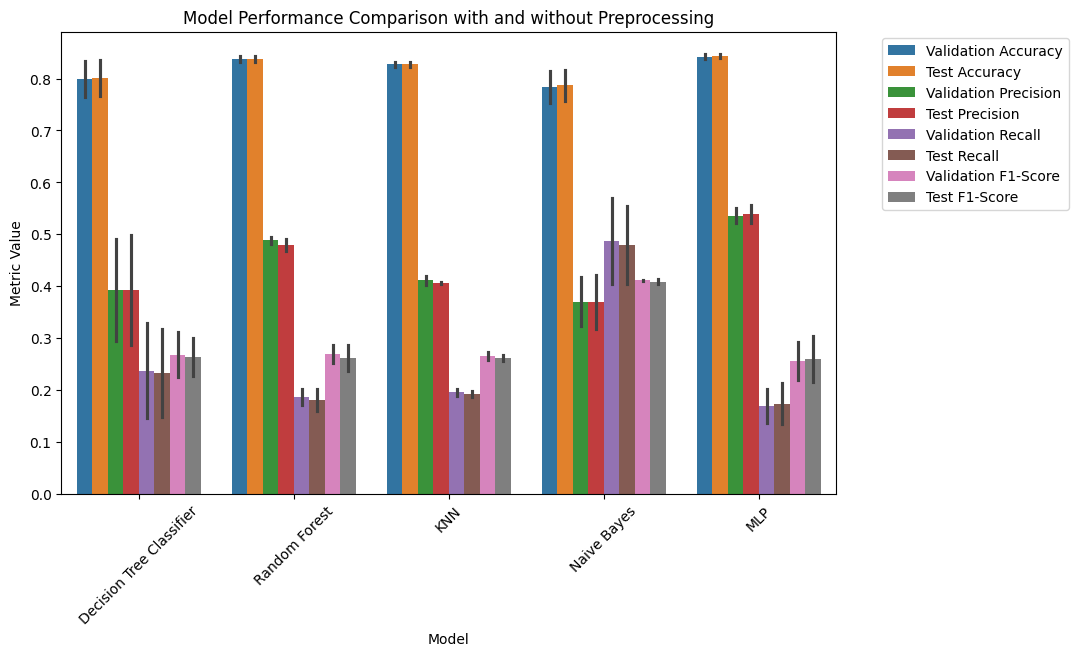

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Add a 'Preprocessing' column to each DataFrame
df_after_presprocessing['Preprocessing'] = 'With Preprocessing'
df_no_presprocessing['Preprocessing'] = 'Without Preprocessing'

# Combine the two DataFrames
df_combined = pd.concat([df_after_presprocessing, df_no_presprocessing])

# Melt the DataFrame
df_melted = df_combined.melt(id_vars=['Model', 'Preprocessing'], var_name='Metric', value_name='Value')

# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, hue_order=['Validation Accuracy', 'Test Accuracy', 'Validation Precision', 'Test Precision', 'Validation Recall', 'Test Recall', 'Validation F1-Score', 'Test F1-Score'])
plt.title('Model Performance Comparison with and without Preprocessing')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
